

# Project: Investigate a Dataset (NO-SHOW Appointments DATASET )

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1- Introduction 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.it has 13 associated variables (characteristics) about the patient and appointment made.
Questions: A person makes the effort to schedual for a doctor appointment, but didn't turned up on their scheduled appointment ,Why is this so ? ,  Below are the questions that i would like to find ou
t from the dataset to understand the possible factors that increase the chances of not showing up in their scheduled appointments 

1-Is having scholarship of brasilian welfare affected on NO-Show rate ?

2-IS there a particular groups of patient ( gender , medical condition, handcap) more prompt to NO-SHOW ?

3-IS no-sms reminder increase the chance of no-show?

Uderstanding the reason could help to reduce the NO-SHOW rate and thus, save operation cost for the goverment as services offered are free of charge .

In [193]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### General Properties

### Gathering Data 

In [194]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### Assesing Data 

In [195]:
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


tip : certian columns appointmentday , schedualday need to change datatype to datetype there no NAN values

In [197]:
sum(df.duplicated())

0

In [198]:
sum(df['PatientId'].duplicated())

48228

In [199]:
sum(df['AppointmentID'].duplicated())

0

In [200]:
sum(df['ScheduledDay'].duplicated())

6978

In [201]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [202]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000


### Data Cleaning 

In [203]:
df.drop_duplicates(subset=['PatientId'], inplace= True)

In [204]:
sum(df['PatientId'].duplicated())

0

In [205]:
df.drop_duplicates(subset=['ScheduledDay'],inplace= True)

In [206]:
sum(df['ScheduledDay'].duplicated())

0

In [207]:
df.shape

(60509, 14)

In [208]:
df.rename(columns=lambda x: x.strip().replace("-", "_").lower(), inplace=True)

In [209]:
df.head(1)

patientid  appointmentid gender          scheduledday  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   

         appointmentday  age    neighbourhood  scholarship  hipertension  \
0  2016-04-29T00:00:00Z   62  JARDIM DA PENHA            0             1   

   diabetes  alcoholism  handcap  sms_received no_show  
0         0           0        0             0      No

here we rename by lower case to be easy for coding and call columns 

In [210]:
df.shape

(60509, 14)

In [211]:
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no_show            object
dtype: object

 now we need to convert dtype for both scheduledday and appointmentday to datetype

In [212]:
df['scheduledday']= pd.to_datetime(df['scheduledday'])

In [213]:
df['appointmentday']= pd.to_datetime(df['appointmentday'])

In [214]:
df.dtypes

patientid                float64
appointmentid              int64
gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no_show                   object
dtype: object

In [215]:
df.head()

patientid  appointmentid gender        scheduledday appointmentday  age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27     2016-04-29   56   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04     2016-04-29   62   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31     2016-04-29    8   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23     2016-04-29   56   

       neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   handcap  sms_received no_show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

In [216]:
df['gender'].value_counts()

F    38891
M    21618
Name: gender, dtype: int64

In [217]:
df['scholarship'].value_counts()

0    54913
1     5596
Name: scholarship, dtype: int64

In [218]:
df['no_show'].value_counts()

No     48674
Yes    11835
Name: no_show, dtype: int64

In [219]:
df.drop(df[df['age'] == -1].index, inplace = True)

In [220]:
df[df.age == -1]

Empty DataFrame
Columns: [patientid, appointmentid, gender, scheduledday, appointmentday, age, neighbourhood, scholarship, hipertension, diabetes, alcoholism, handcap, sms_received, no_show]
Index: []

In [221]:
df.head(1)

patientid  appointmentid gender        scheduledday appointmentday  age  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08     2016-04-29   62   

     neighbourhood  scholarship  hipertension  diabetes  alcoholism  handcap  \
0  JARDIM DA PENHA            0             1         0           0        0   

   sms_received no_show  
0             0      No

In [222]:
df.shape

(60508, 14)

### Exploring with Visuals  and Conclusion

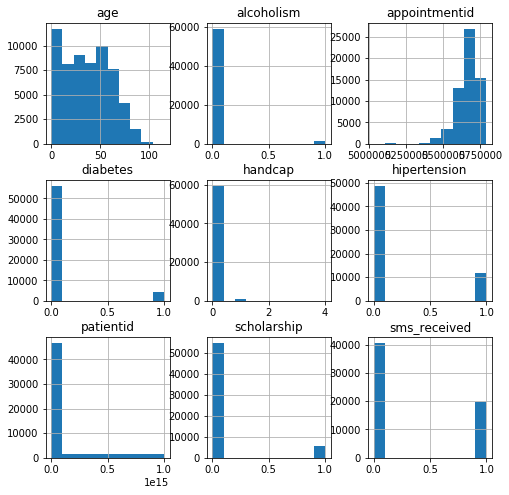

In [223]:
df.hist(figsize= (8,8));

age
count  60508.000000
mean      36.672357
std       23.548211
min        0.000000
25%       17.000000
50%       36.000000
75%       56.000000
max      115.000000

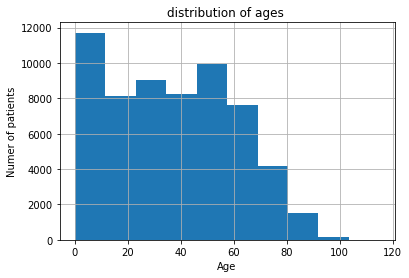

In [224]:
ex = df['age'].hist()
ex.set_ylabel('Numer of patients')
ex.set_xlabel('Age')
ex.set_title('distribution of ages ')
pd.DataFrame(df['age'].describe())

### Q1- Is having scholarship of brasilian welfare affected on NO-Show rate  ?

In [225]:
df.groupby('scholarship')['no_show'].value_counts()


scholarship  no_show
0            No         44334
             Yes        10578
1            No          4339
             Yes         1257
Name: no_show, dtype: int64

In [226]:
df=df[df.scholarship == 1] 

In [227]:
df.head()

patientid  appointmentid gender        scheduledday appointmentday  \
12  5.666548e+14        5634718      F 2016-04-28 11:33:51     2016-04-29   
17  1.479497e+13        5633460      F 2016-04-28 09:28:57     2016-04-29   
18  1.713538e+13        5621836      F 2016-04-26 10:54:18     2016-04-29   
31  3.112849e+11        5628907      M 2016-04-27 12:07:14     2016-04-29   
33  7.653517e+12        5616921      F 2016-04-25 15:01:04     2016-04-29   

    age   neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
12   22  NOVA PALESTINA            1             0         0           0   
17   40       CONQUISTA            1             0         0           0   
18   30  NOVA PALESTINA            1             0         0           0   
31   12  NOVA PALESTINA            1             0         0           0   
33   38   SÃO CRISTÓVÃO            1             0         0           0   

    handcap  sms_received no_show  
12        0             0      No  
17        0             0     Yes  
18        0             1      No  
31        0             0     Yes  
33        0             1      No

scholarship  no_show
1            No         4339
             Yes        1257
Name: no_show, dtype: int64

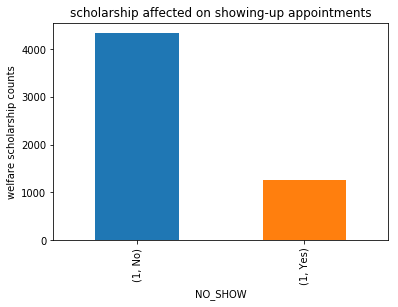

In [228]:
df.groupby('scholarship')['no_show'].value_counts().plot(kind='bar', title='scholarship affected on showing-up appointments').set_ylabel('welfare scholarship counts');
plt.xlabel('NO_SHOW');
df.groupby('scholarship')['no_show'].value_counts()

### this bar chart depict that patients who have welfare scholarships are more to be predictable to show-up their medical appointments 

### Q2- IS there a particular groups of patient ( Age, gender , medical condition, handcap) more prompt to NO-SHOW ?

mean        std
no_show                      
No       30.159023  18.023781
Yes      28.945107  16.159762

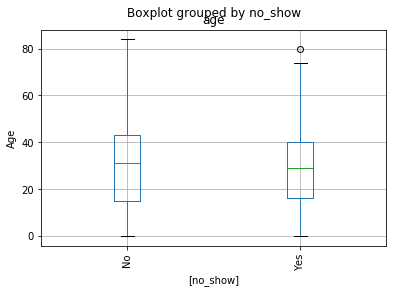

In [229]:
df.boxplot(['age'], by = ['no_show'], rot=90);
plt.ylabel('Age');
pd.DataFrame(df.groupby('no_show')['age'].describe().loc[:,['mean','std']])

### plot describes the age distribution of patients who showing-up on scadual as( NO) means to be showed-up on time .

 ### 1-Medical condition (diabetes , hipertension)

In [230]:
df = df[(df.diabetes == 1) & (df.hipertension == 1)]

In [231]:
df.head()

patientid  appointmentid gender        scheduledday appointmentday  \
37    1.578132e+12        5637986      F 2016-04-29 07:35:56     2016-04-29   
920   4.411468e+14        5543328      F 2016-04-05 10:01:02     2016-04-29   
986   9.164578e+10        5607919      F 2016-04-20 12:52:41     2016-04-29   
1644  7.385364e+12        5618149      F 2016-04-26 06:33:10     2016-04-29   
1778  3.649915e+12        5536651      F 2016-04-01 08:55:20     2016-04-29   

      age   neighbourhood  scholarship  hipertension  diabetes  alcoholism  \
37     64      TABUAZEIRO            1             1         1           0   
920    53      DO MOSCOSO            1             1         1           0   
986    59  NOVA PALESTINA            1             1         1           0   
1644   59        GURIGICA            1             1         1           0   
1778   60      DO MOSCOSO            1             1         1           1   

      handcap  sms_received no_show  
37          0             0      No  
920         0             1      No  
986         0             1      No  
1644        0             0     Yes  
1778        0             1     Yes

In [232]:
df.groupby('diabetes')['no_show'].value_counts()

diabetes  no_show
1         No         190
          Yes         37
Name: no_show, dtype: int64

diabetes  no_show
1         No         190
          Yes         37
Name: no_show, dtype: int64

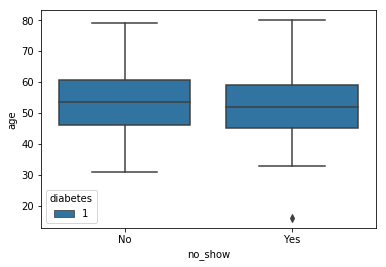

In [233]:
sns.boxplot(x=df.no_show, y=df.age, hue=df.diabetes);
df.groupby('diabetes')['no_show'].value_counts()

hipertension  no_show
1             No         190
              Yes         37
Name: no_show, dtype: int64

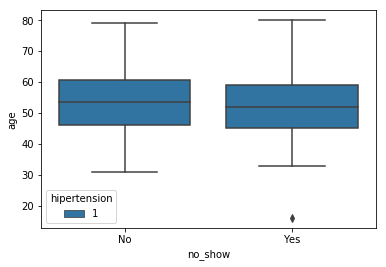

In [234]:
sns.boxplot(x=df.no_show, y=df.age, hue=df.hipertension);
df.groupby('hipertension')['no_show'].value_counts()

### These  box plots  dipct the continous distribution feature of (diabetes and hipertension )with patients ages and no-show action which observe that patients with chronic dieseases are more predictable to show -up on time  ,as NO meanes patient who show-up on schedual 

### 2- Gender 

gender
F    205
M     22
Name: patientid, dtype: int64

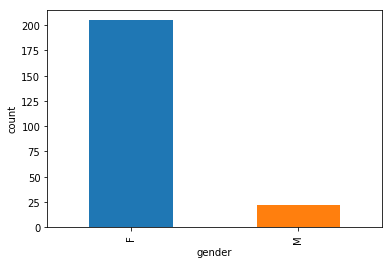

In [235]:
df.groupby('gender')['patientid'].count().plot(kind='bar').set_ylabel('count')
df.groupby('gender')['patientid'].count()

In [236]:
df=df[df.no_show =='No'] 

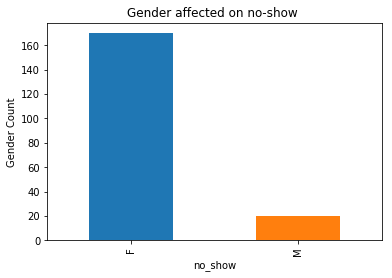

In [237]:
df.groupby('gender')['no_show'].count().plot(kind='bar');
plt.title('Gender affected on no-show ');
plt.xlabel('no_show');
plt.ylabel('Gender Count');

 ### Females are more predictable to show-up on time than males 


handcap
0    183
1      7
Name: patientid, dtype: int64

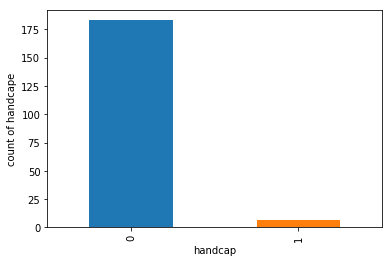

In [238]:
df.groupby('handcap')['patientid'].count().plot(kind='bar').set_ylabel('count of handcape')
df.groupby('handcap')['patientid'].count()


handcap
0    183
1      7
Name: no_show, dtype: int64

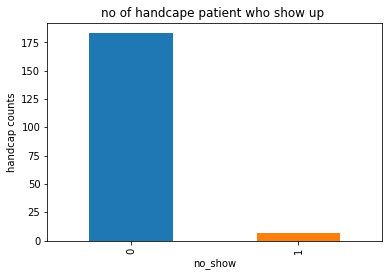

In [239]:
df.groupby('handcap')['no_show'].count().plot(kind='bar');
plt.title('no of handcape patient who show up ');
plt.xlabel('no_show');
plt.ylabel('handcap counts');
df.groupby('handcap')['no_show'].count()

### handcap patients are more predictable to show-up on shedual 


### IS no-sms reminder increase the chance of no-show?

sms_received  no_show
0             No         133
1             No          57
Name: no_show, dtype: int64

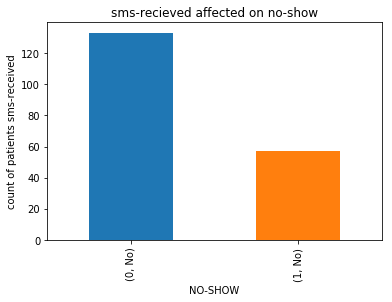

In [240]:
df.groupby('sms_received')['no_show'].value_counts().plot(kind='bar');
plt.title('sms-recieved affected on no-show');
plt.xlabel('NO-SHOW');
plt.ylabel('count of patients sms-received');
df.groupby('sms_received')['no_show'].value_counts()

### its obvious that sms- received variable has no effect on increase show-up patients 

<a id='conclusions'></a>
## Conclusions

BY Dataanalysis there are some factores that appeared and affected on patient showing up for their medical appointments

1- patients who have welfare-brasillian scholarship are more predicted to show-up their medical appointments

2- patients who have chronic diseases ( diabetes and hipertension ),handcaps and female patients  are moe predicted to showup on schudual 

3- Also sms reminder recieved  variable  has no-effect on  increase number of patients who show up thier medical appointments

limitations 
it is noticed that there are limitations for our analysis

for Age there was a mines value entered indataset which is illogical value which should be deleted 

for AppointmentDay and SchedualDay datatype should be converted to datetime 

for duplicates rows in ids columns were deleted 

No of patients on dataset are suitable enough for data-analysis there are no NANs 


In [242]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0